<a href="https://www.kaggle.com/code/mrsimple07/diabetes-prediction-eda-prediction?scriptVersionId=163462086" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction/Diabetes_prediction.csv


# Importing data and overall data analysis

In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/diabetes-prediction/Diabetes_prediction.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


Checking missing values

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

# Exploratory Data Analysis (EDA)
In this section, we will perform exploratory data analysis to gain insights into the dataset and understand the distribution of features.

#### 1. Numerical Values analysis

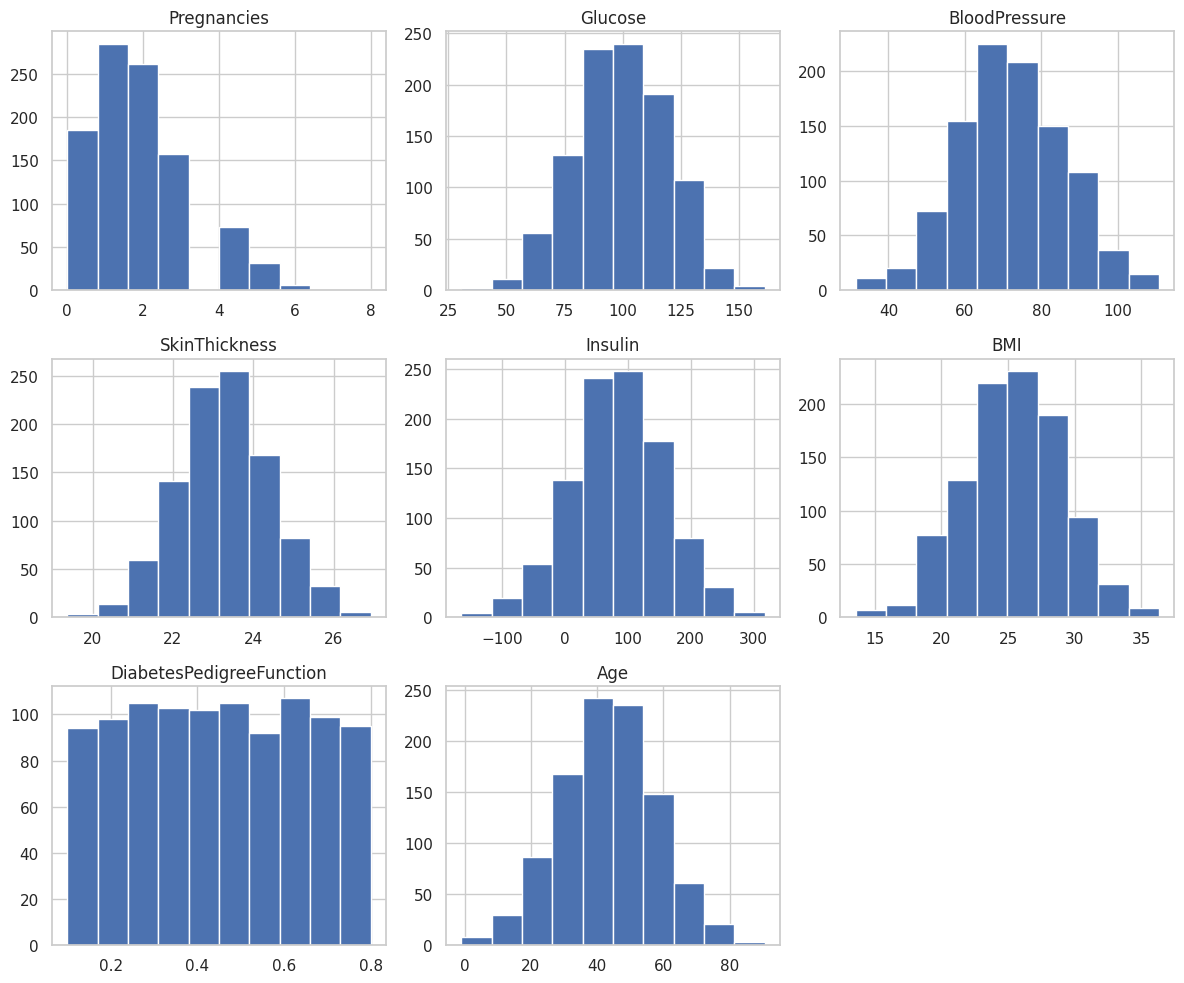

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[numerical_features].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

#### 2. Correlation analysis

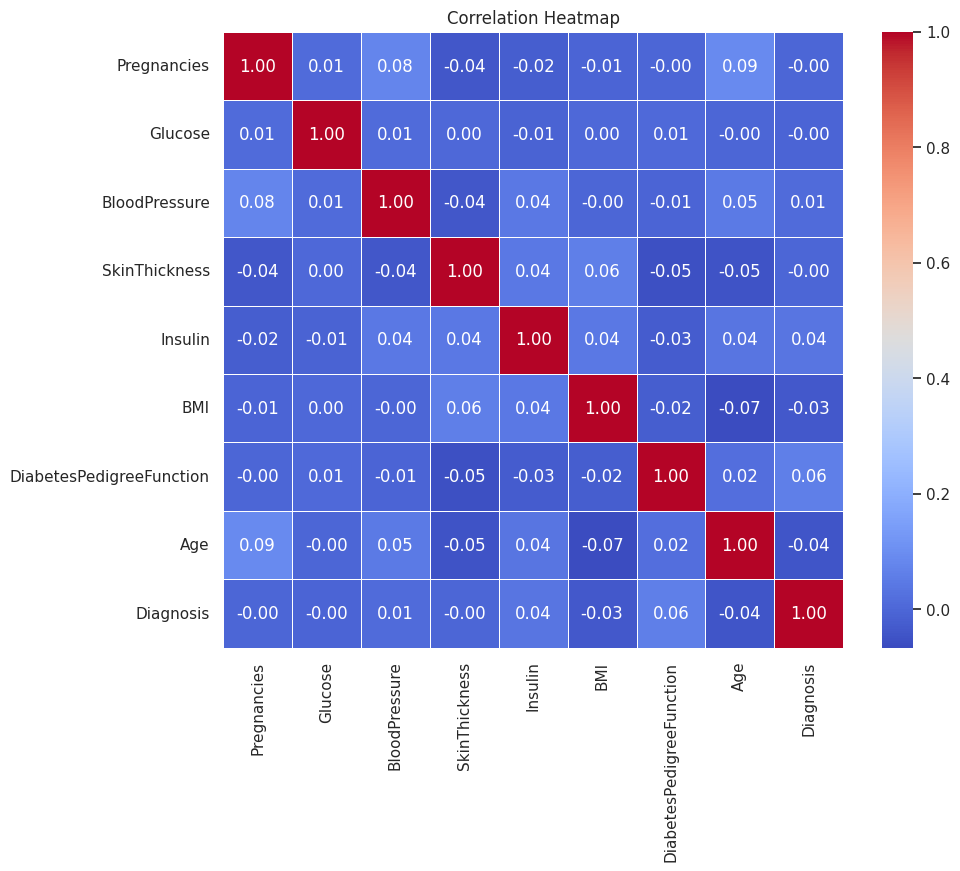

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### 3. Distribution Plots

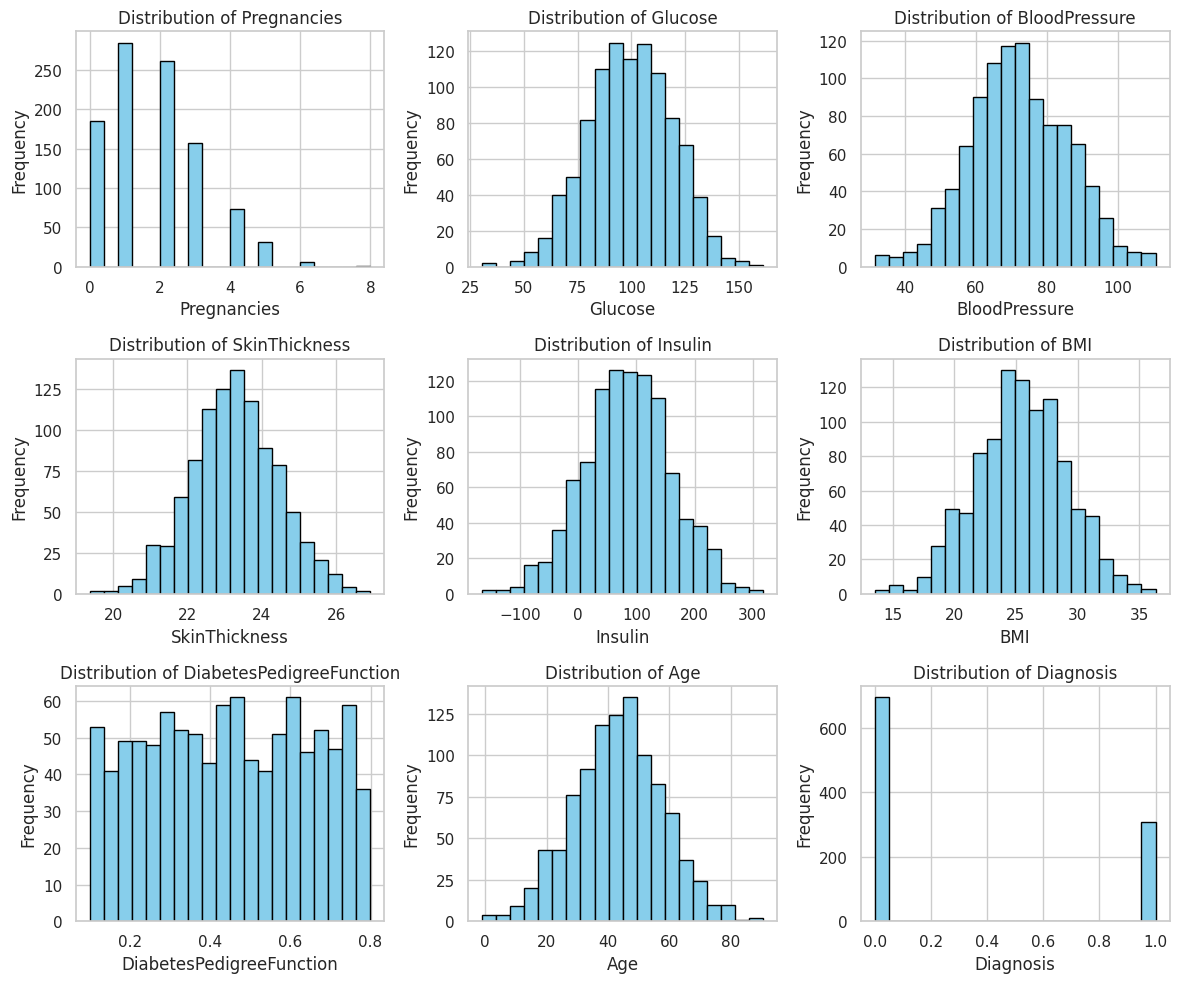

In [8]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Model Selection & Evaluation

#### 1. Logistic Regression, Decision Tree, Random Forest
First we are going to check Models like Logistic Regression, Decision Tree, Random Forest 

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')

X = df.drop(['Diagnosis'], axis =1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

models = [log_reg, decision_tree, random_forest]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")

# Perform cross-validation for each model
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.2f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.69
Precision: 0.00
Recall: 0.00
F1-score: 0.00
ROC-AUC: 0.50


Model: Decision Tree
Accuracy: 0.55
Precision: 0.27
Recall: 0.25
F1-score: 0.26
ROC-AUC: 0.47


Model: Random Forest
Accuracy: 0.64
Precision: 0.14
Recall: 0.03
F1-score: 0.05
ROC-AUC: 0.47


Cross-validation scores for Logistic Regression: [0.69375 0.69375 0.68125 0.70625 0.7    ]
Mean CV accuracy: 0.70


Cross-validation scores for Decision Tree: [0.51875 0.575   0.51875 0.60625 0.53125]
Mean CV accuracy: 0.55


Cross-validation scores for Random Forest: [0.6625  0.68125 0.6375  0.6875  0.66875]
Mean CV accuracy: 0.67




#### 2. XGBClassifier with Optuna

In [10]:
import optuna
import xgboost as xgb
from sklearn.metrics import accuracy_score


def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0, step=0.1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0, step=0.1),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0, step=0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 1, 10, step=1)
    }
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], early_stopping_rounds=10, verbose=False)
    
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Best hyperparameters:', study.best_params)
print('Best accuracy:', study.best_value)

[I 2024-02-19 17:19:24,039] A new study created in memory with name: no-name-69b35677-c5d8-4ca4-8997-ac806ca4f4ed
[I 2024-02-19 17:19:24,333] Trial 0 finished with value: 0.685 and parameters: {'max_depth': 4, 'learning_rate': 0.07945189326315599, 'n_estimators': 1000, 'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0.1, 'min_child_weight': 8.0}. Best is trial 0 with value: 0.685.
[I 2024-02-19 17:19:24,381] Trial 1 finished with value: 0.685 and parameters: {'max_depth': 10, 'learning_rate': 0.08473050443063036, 'n_estimators': 400, 'subsample': 0.6, 'colsample_bytree': 1.0, 'gamma': 0.7000000000000001, 'min_child_weight': 3.0}. Best is trial 0 with value: 0.685.
[I 2024-02-19 17:19:24,427] Trial 2 finished with value: 0.685 and parameters: {'max_depth': 8, 'learning_rate': 0.01569472783233732, 'n_estimators': 200, 'subsample': 0.9, 'colsample_bytree': 0.8, 'gamma': 0.6000000000000001, 'min_child_weight': 4.0}. Best is trial 0 with value: 0.685.
[I 2024-02-19 17:19:24,467] Trial 3

Best hyperparameters: {'max_depth': 4, 'learning_rate': 0.07945189326315599, 'n_estimators': 1000, 'subsample': 0.6, 'colsample_bytree': 0.8, 'gamma': 0.1, 'min_child_weight': 8.0}
Best accuracy: 0.685


In [11]:
best_params = {'max_depth': 8, 'learning_rate': 0.0021860047578599884, 'n_estimators': 1000, 'subsample': 0.5, 'colsample_bytree': 0.8, 'gamma': 0.0, 'min_child_weight': 7.0}

model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.685


#### Thank you for following along with our analysis! If you like it, please upvote it!
